In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
import os
# Don't be confuse with the `IBMQ_API` is an environment variable
# of my system which I gave a value of my IBMQ api token key

api_token_key = os.environ.get('IBMQ_API') # OR
# api_token_key = os.getenv('IBMQ_API')

from qiskit import IBMQ
IBMQ.save_account(api_token_key, overwrite=True)

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
from qiskit import *

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [6]:
circuit = QuantumCircuit(qr, cr)
%matplotlib inline

In [7]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [8]:
circuit.h(qr[0])

In [9]:
# circuit.draw(output='mpl')
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [10]:
circuit.cx(qr[0], qr[1]) # two qubit operation is lika a logical if

In [11]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [12]:
circuit.measure(qr, cr)

In [13]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [14]:
simulator = Aer.get_backend('qasm_simulator') # qasm - quantum assembly language
execute(circuit, backend = simulator)

In [15]:
result = execute(circuit, backend = simulator).result()

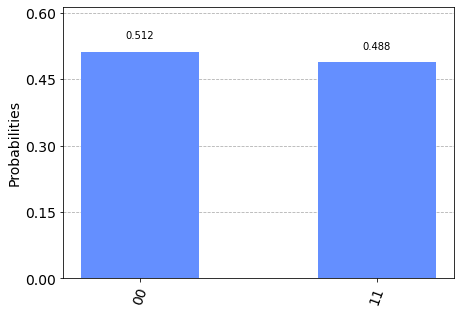

In [16]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [17]:
provider = IBMQ.get_provider('ibm-q')
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmq_lima has 28 queued and 5 qubits
ibmq_belem has 31 queued and 5 qubits
ibmq_quito has 285 queued and 5 qubits
simulator_statevector has 1 queued and simulated qubits
simulator_mps has 1 queued and simulated qubits
simulator_extended_stabilizer has 1 queued and simulated qubits
simulator_stabilizer has 1 queued and simulated qubits
ibmq_manila has 116 queued and 5 qubits
ibm_nairobi has 31 queued and 7 qubits
ibm_oslo has 27 queued and 7 qubits


In [18]:
qcomp = provider.get_backend('ibm_nairobi')
job = execute(circuit, backend=qcomp)

In [19]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


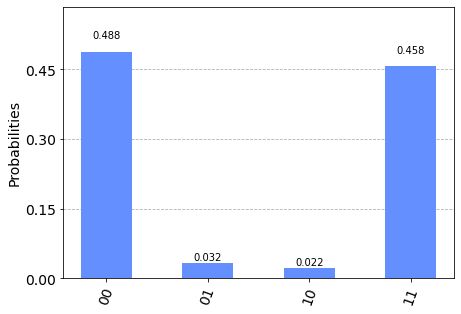

In [20]:
result = job.result()
plot_histogram(result.get_counts(circuit))